# Homework 1
## CSCI 7000 - Applied Machine Learning
### Adam Resnick

#### Dataset: CIFAR10

# Loading Libraries

In [1]:
import keras as k
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Dense, Activation, Flatten
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils
np.random.seed(101) # for reproducibility”
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


#Loading Dataset
from keras.datasets import cifar10

Using TensorFlow backend.
C:\Users\Adam\Anaconda\envs\DeepLearningEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Adam\Anaconda\envs\DeepLearningEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Adam\Anaconda\envs\DeepLearningEnv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Adam\Anaconda\

# Preparing CIFAR10 Dataset for NN and DNN

#### I decided to convert the CIFAR-10 data to grayscale for the NN for simplicity's sake. Each image was reshaped to a 1x1024 vector, creating a 50,000x1024 training set. One important not: you do not need to divide by 255 to normalize the data, as the rgb2gray function does this automaticall. (It took me a while to figure this out).

50000 train samples
10000 test samples


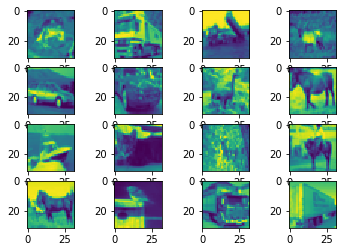

In [2]:
#LOAING DATASET FOR NN
from keras.datasets import cifar10
(x_trainNN, y_trainNN), (x_testNN, y_testNN) = cifar10.load_data()

#DATA RESHAPING
#X_train is 60000 rows of 32x32 values --> reshaped in 60000 x 1024
x_trainNN = rgb2gray(x_trainNN)
x_testNN = rgb2gray(x_testNN)
x_trainNN = x_trainNN.reshape(50000, 1024)
x_testNN = x_testNN.reshape(10000, 1024)
x_trainNN = x_trainNN.astype('float32')
x_testNN = x_testNN.astype('float32')

#x_trainNN /= 255 ############ NEVER EVER DO THIS AGAIN WITH rgb2gray!!!!!!!!!!!!!!!!!!!!!!
#x_testNN /= 255 ############ NEVER EVER DO THIS AGAIN WITH rgb2gray!!!!!!!!!!!!!!!!!!!!!!

print(x_trainNN.shape[0], 'train samples')
print(x_testNN.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_trainNN = np_utils.to_categorical(y_trainNN, 10)
y_testNN = np_utils.to_categorical(y_testNN, 10)


#PLOTTING IMAGES
for I in range(4):
    for J in range(4):
        plt.subplot(4,4,I*4+J+1)
        plt.imshow(x_trainNN[I*4+J,:].reshape(32,32))
plt.show()

# Simple Neural Network
# >> Accuracy ~0.26-0.30, depending on batch size (highest with size of 100). AKA: Not Great

#### With the simple neural network, I decided to play around with batch size. I used batch sizes of 10, 25, 100, 1,000, and 10,000. The best results were obtained with a batch size of 100. These results, however, were still quite poor, with the model only correctly predicting the classification 30% of the time. 

In [5]:
# BATCH SIZE = 10, stopped epochs at 30 after seeing no improvement
modelNN1 = Sequential()
modelNN1.add(Dense(10, activation='softmax', input_shape=(1024,), kernel_initializer='random_uniform'))
modelNN1.summary()

epochs_SNN1 = 30
batch_size_SNN1 = 10

modelNN1.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])
history = modelNN1.fit(x_trainNN, y_trainNN, batch_size=batch_size_SNN1, epochs=epochs_SNN1, verbose=1, validation_split=0.2)

score = modelNN1.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 4s 93us/step - loss: 2.1320 - categorical_accuracy: 0.2331 - val_loss: 2.0980 - val_categorical_accuracy: 0.2373
Epoch 2/30
40000/40000 [==============================] - 4s 89us/step - loss: 2.0843 - categorical_accuracy: 0.2597 - val_loss: 2.1400 - val_categorical_accuracy: 0.2532
Epoch 3/30
40000/40000 [==============================] - 4s 93us/step - loss: 2.0704 - categorical_accuracy: 0.2680 - val_loss: 2.1590 - val_categorical_accuracy: 0.2297
Epoch 

In [6]:
# BATCH SIZE = 25, stopped epochs at 50 after seeing no improvement
modelNN2 = Sequential()
modelNN2.add(Dense(10, activation='softmax', input_shape=(1024,), kernel_initializer='random_uniform'))
modelNN2.summary()

epochs_SNN2 = 50
batch_size_SNN2 = 25

modelNN2.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])
history = modelNN2.fit(x_trainNN, y_trainNN, batch_size=batch_size_SNN2, epochs=epochs_SNN2, verbose=1, validation_split=0.2)

score = modelNN2.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 2s 45us/step - loss: 2.1230 - categorical_accuracy: 0.2310 - val_loss: 2.0724 - val_categorical_accuracy: 0.2711
Epoch 2/50
40000/40000 [==============================] - 2s 42us/step - loss: 2.0653 - categorical_accuracy: 0.2683 - val_loss: 2.0571 - val_categorical_accuracy: 0.2782
Epoch 3/50
40000/40000 [==============================] - 2s 42us/step - loss: 2.0510 - categorical_accuracy: 0.2747 - val_loss: 2.0739 - val_categorical_accuracy: 0.2585
Epoch 4/50
40000/40000 [==============================] - 2s 43us/step - loss: 2.0415 - categorical_acc

Epoch 46/50
40000/40000 [==============================] - 2s 41us/step - loss: 1.9790 - categorical_accuracy: 0.3139 - val_loss: 2.0580 - val_categorical_accuracy: 0.2847
Epoch 47/50
40000/40000 [==============================] - 2s 45us/step - loss: 1.9770 - categorical_accuracy: 0.3134 - val_loss: 2.0335 - val_categorical_accuracy: 0.2938
Epoch 48/50
40000/40000 [==============================] - 2s 41us/step - loss: 1.9775 - categorical_accuracy: 0.3131 - val_loss: 2.0207 - val_categorical_accuracy: 0.2923
Epoch 49/50
40000/40000 [==============================] - 2s 42us/step - loss: 1.9786 - categorical_accuracy: 0.3142 - val_loss: 2.0320 - val_categorical_accuracy: 0.2780
Epoch 50/50
10000/10000 [==============================] - 0s 12us/step
Test score: 2.046433031463623
Test accuracy: 0.2808


In [8]:
# BATCH SIZE = 100, stopped epochs at 50 after seeing no improvement
modelNN3 = Sequential()
modelNN3.add(Dense(10, activation='softmax', input_shape=(1024,), kernel_initializer='random_uniform'))
modelNN3.summary()

epochs_NN3 = 50
batch_size_NN3 = 100

modelNN3.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])
history = modelNN3.fit(x_trainNN, y_trainNN, batch_size=batch_size_NN3, epochs=epochs_NN3, verbose=1, validation_split=0.2)

score = modelNN3.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 1s 20us/step - loss: 2.1766 - categorical_accuracy: 0.2073 - val_loss: 2.1171 - val_categorical_accuracy: 0.2392
Epoch 2/50
40000/40000 [==============================] - 1s 19us/step - loss: 2.0980 - categorical_accuracy: 0.2513 - val_loss: 2.0829 - val_categorical_accuracy: 0.2599
Epoch 3/50
40000/40000 [==============================] - 1s 16us/step - loss: 2.0743 - categorical_accuracy: 0.2639 - val_loss: 2.0722 - val_categorical_accuracy: 0.2709
Epoch 4/50
40000/40000 [==============================] - 1s 16us/step - loss: 2.0609 - categorical_acc

In [9]:
# BATCH SIZE = 1000, stopped epochs at 100 after seeing no improvement
modelNN4 = Sequential()
modelNN4.add(Dense(10, activation='softmax', input_shape=(1024,), kernel_initializer='random_uniform'))
modelNN4.summary()

epochs_SNN4 = 100
batch_size_SNN4 = 1000

modelNN4.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])
history = modelNN4.fit(x_trainNN, y_trainNN, batch_size=batch_size_SNN4, epochs=epochs_SNN4, verbose=1, validation_split=0.2)

score = modelNN4.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 1s 13us/step - loss: 2.2974 - categorical_accuracy: 0.1284 - val_loss: 2.2611 - val_categorical_accuracy: 0.1682
Epoch 2/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.2388 - categorical_accuracy: 0.1778 - val_loss: 2.2176 - val_categorical_accuracy: 0.1976
Epoch 3/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.2032 - categorical_accuracy: 0.2006 - val_loss: 2.1888 - val_categorical_accuracy: 0.2110
Epoch 4/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.1791 - categorical_ac

Epoch 46/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.0452 - categorical_accuracy: 0.2855 - val_loss: 2.0525 - val_categorical_accuracy: 0.2822
Epoch 47/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.0444 - categorical_accuracy: 0.2874 - val_loss: 2.0522 - val_categorical_accuracy: 0.2849
Epoch 48/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.0438 - categorical_accuracy: 0.2875 - val_loss: 2.0516 - val_categorical_accuracy: 0.2822
Epoch 49/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.0433 - categorical_accuracy: 0.2863 - val_loss: 2.0509 - val_categorical_accuracy: 0.2844
Epoch 50/100
40000/40000 [==============================] - 0s 10us/step - loss: 2.0424 - categorical_accuracy: 0.2864 - val_loss: 2.0515 - val_categorical_accuracy: 0.2864
Epoch 51/100
40000/40000 [==============================] - 0s 9us/step - loss: 2.0418 - categorical_accuracy: 0.2888 - val_loss: 2.0505 - 

In [10]:
# BATCH SIZE = 10000, stopped epochs at 400 after seeing no improvement
modelNN5 = Sequential()
modelNN5.add(Dense(10, activation='softmax', input_shape=(1024,), kernel_initializer='random_uniform'))
modelNN5.summary()

epochs_SNN5 = 400
batch_size_SNN5 = 10000

modelNN5.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])
history = modelNN5.fit(x_trainNN, y_trainNN, batch_size=batch_size_SNN5, epochs=epochs_SNN5, verbose=1, validation_split=0.2)

score = modelNN5.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                10250     
Total params: 10,250
Trainable params: 10,250
Non-trainable params: 0
_________________________________________________________________
Train on 40000 samples, validate on 10000 samples
Epoch 1/400
40000/40000 [==============================] - 1s 14us/step - loss: 2.3751 - categorical_accuracy: 0.0987 - val_loss: 2.3231 - val_categorical_accuracy: 0.1090
Epoch 2/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.3115 - categorical_accuracy: 0.1134 - val_loss: 2.3035 - val_categorical_accuracy: 0.1174
Epoch 3/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.2978 - categorical_accuracy: 0.1220 - val_loss: 2.2939 - val_categorical_accuracy: 0.1279
Epoch 4/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.2893 - categorical_ac

Epoch 46/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.1509 - categorical_accuracy: 0.2353 - val_loss: 2.1512 - val_categorical_accuracy: 0.2361
Epoch 47/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.1495 - categorical_accuracy: 0.2343 - val_loss: 2.1500 - val_categorical_accuracy: 0.2370
Epoch 48/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.1482 - categorical_accuracy: 0.2362 - val_loss: 2.1487 - val_categorical_accuracy: 0.2369
Epoch 49/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.1470 - categorical_accuracy: 0.2352 - val_loss: 2.1475 - val_categorical_accuracy: 0.2366
Epoch 50/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.1457 - categorical_accuracy: 0.2369 - val_loss: 2.1462 - val_categorical_accuracy: 0.2385
Epoch 51/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.1445 - categorical_accuracy: 0.2356 - val_loss: 2.1451 - v

40000/40000 [==============================] - 0s 7us/step - loss: 2.0908 - categorical_accuracy: 0.2623 - val_loss: 2.0937 - val_categorical_accuracy: 0.2588
Epoch 141/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0905 - categorical_accuracy: 0.2629 - val_loss: 2.0934 - val_categorical_accuracy: 0.2592
Epoch 142/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0901 - categorical_accuracy: 0.2634 - val_loss: 2.0931 - val_categorical_accuracy: 0.2590
Epoch 143/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0898 - categorical_accuracy: 0.2631 - val_loss: 2.0928 - val_categorical_accuracy: 0.2589
Epoch 144/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.0895 - categorical_accuracy: 0.2629 - val_loss: 2.0925 - val_categorical_accuracy: 0.2602
Epoch 145/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0892 - categorical_accuracy: 0.2637 - val_loss: 2.0922 - val_categ

40000/40000 [==============================] - 0s 8us/step - loss: 2.0682 - categorical_accuracy: 0.2758 - val_loss: 2.0728 - val_categorical_accuracy: 0.2705
Epoch 235/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0681 - categorical_accuracy: 0.2756 - val_loss: 2.0727 - val_categorical_accuracy: 0.2698
Epoch 236/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0679 - categorical_accuracy: 0.2764 - val_loss: 2.0725 - val_categorical_accuracy: 0.2713
Epoch 237/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0677 - categorical_accuracy: 0.2769 - val_loss: 2.0724 - val_categorical_accuracy: 0.2700
Epoch 238/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0676 - categorical_accuracy: 0.2759 - val_loss: 2.0722 - val_categorical_accuracy: 0.2702
Epoch 239/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0674 - categorical_accuracy: 0.2760 - val_loss: 2.0721 - val_categ

40000/40000 [==============================] - 0s 6us/step - loss: 2.0554 - categorical_accuracy: 0.2825 - val_loss: 2.0614 - val_categorical_accuracy: 0.2797
Epoch 329/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.0553 - categorical_accuracy: 0.2810 - val_loss: 2.0614 - val_categorical_accuracy: 0.2792
Epoch 330/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.0551 - categorical_accuracy: 0.2822 - val_loss: 2.0613 - val_categorical_accuracy: 0.2795
Epoch 331/400
40000/40000 [==============================] - 0s 7us/step - loss: 2.0550 - categorical_accuracy: 0.2823 - val_loss: 2.0612 - val_categorical_accuracy: 0.2793
Epoch 332/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.0550 - categorical_accuracy: 0.2824 - val_loss: 2.0611 - val_categorical_accuracy: 0.2791
Epoch 333/400
40000/40000 [==============================] - 0s 6us/step - loss: 2.0548 - categorical_accuracy: 0.2827 - val_loss: 2.0610 - val_categ

#### The first VERY simple neural network yielded predictably poor results, with max accuracy reaching ~0.30 and not improving any more. To see if I could improve this more, I created the following Deep Neural Network:

# Deep Neural Network
## >> Accuracy ~0.42%

In [11]:
modelDNN = Sequential()
modelDNN.add(Dense(128, input_shape=(1024,)))
modelDNN.add(Activation('relu'))
modelDNN.add(Dense(256))
modelDNN.add(Activation('relu'))
modelDNN.add(Dense(512))
modelDNN.add(Activation('relu'))
modelDNN.add(Dense(256))
modelDNN.add(Activation('relu'))
modelDNN.add(Dense(128))
modelDNN.add(Activation('relu'))
modelDNN.add(Dense(10))
modelDNN.add(Activation('softmax'))
modelDNN.summary()
modelDNN.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['categorical_accuracy'])

from keras.utils import plot_model
plot_model(modelDNN, show_shapes='true', to_file='figs/model.png')

epochs_DNN = 200
batch_size_DNN = 25

history_DNN = modelDNN.fit(x_trainNN, y_trainNN,
batch_size=batch_size_DNN, epochs=epochs_DNN,
verbose=1, validation_split=0.2)

score = modelDNN.evaluate(x_testNN, y_testNN, verbose=1)
print("Test score:", score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 128)               131200    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               33024     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_3 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
__________

Epoch 37/200
40000/40000 [==============================] - 8s 200us/step - loss: 1.0538 - categorical_accuracy: 0.6291 - val_loss: 1.7427 - val_categorical_accuracy: 0.4350
Epoch 38/200
40000/40000 [==============================] - 8s 200us/step - loss: 1.0320 - categorical_accuracy: 0.6347 - val_loss: 1.7363 - val_categorical_accuracy: 0.4382
Epoch 39/200
40000/40000 [==============================] - 7s 185us/step - loss: 1.0043 - categorical_accuracy: 0.6451 - val_loss: 1.7916 - val_categorical_accuracy: 0.4383
Epoch 40/200
40000/40000 [==============================] - 7s 180us/step - loss: 0.9803 - categorical_accuracy: 0.6528 - val_loss: 1.7755 - val_categorical_accuracy: 0.4488
Epoch 41/200
40000/40000 [==============================] - 7s 179us/step - loss: 0.9561 - categorical_accuracy: 0.6631 - val_loss: 1.9131 - val_categorical_accuracy: 0.4241
Epoch 42/200
40000/40000 [==============================] - 7s 180us/step - loss: 0.9295 - categorical_accuracy: 0.6700 - val_loss

Epoch 131/200
40000/40000 [==============================] - 6s 158us/step - loss: 0.0758 - categorical_accuracy: 0.9755 - val_loss: 4.9173 - val_categorical_accuracy: 0.4166
Epoch 132/200
40000/40000 [==============================] - 6s 158us/step - loss: 0.0736 - categorical_accuracy: 0.9751 - val_loss: 5.0224 - val_categorical_accuracy: 0.4217
Epoch 133/200
40000/40000 [==============================] - 6s 157us/step - loss: 0.0577 - categorical_accuracy: 0.9804 - val_loss: 4.9575 - val_categorical_accuracy: 0.4176
Epoch 134/200
40000/40000 [==============================] - 6s 157us/step - loss: 0.0654 - categorical_accuracy: 0.9779 - val_loss: 5.0218 - val_categorical_accuracy: 0.4186
Epoch 135/200
40000/40000 [==============================] - 6s 162us/step - loss: 0.1107 - categorical_accuracy: 0.9638 - val_loss: 4.8051 - val_categorical_accuracy: 0.4221
Epoch 136/200
40000/40000 [==============================] - 6s 159us/step - loss: 0.1020 - categorical_accuracy: 0.9663 - va

# CNN MODELS


## CNN Model 1: Color Images
##      >> Accuracy is at .57 after 5 epochs
#### Much of code adapted from https://keras.io/examples/cifar10_cnn/

#### After browsing around the internet, it seemed like most people recommend a batch size of 25 to 32. Going with the batch size of 25, I ran 5 epochs of a color RGB  image and 5 epochs of an grayscale image to compare.

In [12]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from math import ceil

###########################################
batch_size = 25
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
###########################################

# The data, split between train and test sets:
(x_trainCNN1, y_trainCNN1), (x_testCNN1, y_testCNN1) = cifar10.load_data()
print('x_train shape:', x_trainCNN1.shape)
print(x_trainCNN1.shape[0], 'train samples')
print(x_testCNN1.shape[0], 'test samples')
x_trainCNN1 = x_trainCNN1.astype('float32')
x_testCNN1 = x_testCNN1.astype('float32')
x_trainCNN1 /= 255
x_testCNN1 /= 255
y_trainCNN1 = keras.utils.to_categorical(y_trainCNN1, num_classes)
y_testCNN1 = keras.utils.to_categorical(y_testCNN1, num_classes)
n_points = len(x_trainCNN1)
steps_per_epoch = ceil(n_points / batch_size)

modelCNN1 = Sequential()
modelCNN1.add(Conv2D(32, (3, 3), padding='same',input_shape=x_trainCNN1.shape[1:]))
modelCNN1.add(Activation('relu'))
modelCNN1.add(Conv2D(32, (3, 3)))
modelCNN1.add(Activation('relu'))
modelCNN1.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN1.add(Dropout(0.25))

modelCNN1.add(Conv2D(64, (3, 3), padding='same'))
modelCNN1.add(Activation('relu'))
modelCNN1.add(Conv2D(64, (3, 3)))
modelCNN1.add(Activation('relu'))
modelCNN1.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN1.add(Dropout(0.25))

modelCNN1.add(Flatten())
modelCNN1.add(Dense(512))
modelCNN1.add(Activation('relu'))
modelCNN1.add(Dropout(0.5))
modelCNN1.add(Dense(num_classes))
modelCNN1.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelCNN1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [13]:
if not data_augmentation:
    print('Not using data augmentation.')
    modelCNN1.fit(x_trainCNN1, y_trainCNN1,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_testCNN1, y_testCNN1),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_trainCNN1)

    # Fit the model on the batches generated by datagen.flow().
    modelCNN1.fit_generator(datagen.flow(x_trainCNN1, y_trainCNN1,
                                     batch_size=batch_size),
                        epochs=epochs, steps_per_epoch=steps_per_epoch,
                        validation_data=(x_testCNN1, y_testCNN1),
                        workers=4)

    # Score trained model.
scores = modelCNN1.evaluate(x_testCNN1, y_testCNN1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
2000/2000 [==============================] - 321s 161ms/step - loss: 1.8604 - acc: 0.3132 - val_loss: 1.6037 - val_acc: 0.4151
Epoch 2/10
2000/2000 [==============================] - 204s 102ms/step - loss: 1.5448 - acc: 0.4395 - val_loss: 1.3353 - val_acc: 0.5180
Epoch 3/10
2000/2000 [==============================] - 204s 102ms/step - loss: 1.4219 - acc: 0.4875 - val_loss: 1.4169 - val_acc: 0.4967
Epoch 4/10
2000/2000 [==============================] - 189s 95ms/step - loss: 1.3402 - acc: 0.5208 - val_loss: 1.2366 - val_acc: 0.5550
Epoch 5/10
2000/2000 [==============================] - 188s 94ms/step - loss: 1.2732 - acc: 0.5464 - val_loss: 1.2101 - val_acc: 0.5727
Epoch 6/10
2000/2000 [==============================] - 188s 94ms/step - loss: 1.2157 - acc: 0.5698 - val_loss: 1.0493 - val_acc: 0.6289
Epoch 7/10
2000/2000 [==============================] - 1045s 522ms/step - loss: 1.1794 - acc: 0.5839 - val_loss: 1.0919 - val_acc: 0.6100
E

## CNN Model 2: Grayscale Images
##      >> Accuracy maxes out at ~0.71 with a batch size of 50

#### Grayscale seemed to hold the most promise for improving accuracy the fastest, so I proceded to run a model like we did in class for 30 epochs and a batch size of 50, just to experiment. It seems like the batch size of 25 is inded the correct way to go as it increases accuracy faster. 

In [14]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from math import ceil

###########################################
batch_size = 25
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
input_shape_CNN2 = (32, 32, 1)
###########################################

# The data, split between train and test sets:
(x_trainCNN2, y_trainCNN2), (x_testCNN2, y_testCNN2) = cifar10.load_data()
x_trainCNN2 = rgb2gray(x_trainCNN2)
x_testCNN2 = rgb2gray(x_testCNN2)
print('x_train shape:', x_trainCNN2.shape)
print(x_trainCNN2.shape[0], 'train samples')
print(x_testCNN2.shape[0], 'test samples')
x_trainCNN2 = x_trainCNN2.astype('float32')
x_testCNN2 = x_testCNN2.astype('float32')
x_trainCNN2 = x_trainCNN2[:, :, :, np.newaxis]
x_testCNN2 = x_testCNN2[:, :, :, np.newaxis]

#x_trainCNN2 /= 255  #######already normalized grayscale
#x_testCNN2 /= 255  #######already normalized grayscale

y_trainCNN2 = keras.utils.to_categorical(y_trainCNN2, num_classes)
y_testCNN2 = keras.utils.to_categorical(y_testCNN2, num_classes)
n_points = len(x_trainCNN2)
steps_per_epoch = ceil(n_points / batch_size)

modelCNN2 = Sequential()
modelCNN2.add(Conv2D(32, (3, 3), padding='same', input_shape = input_shape_CNN2))
modelCNN2.add(Activation('relu'))
modelCNN2.add(Conv2D(32, (3, 3)))
modelCNN2.add(Activation('relu'))
modelCNN2.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN2.add(Dropout(0.25))

modelCNN2.add(Conv2D(64, (3, 3), padding='same'))
modelCNN2.add(Activation('relu'))
modelCNN2.add(Conv2D(64, (3, 3)))
modelCNN2.add(Activation('relu'))
modelCNN2.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN2.add(Dropout(0.25))

modelCNN2.add(Flatten())
modelCNN2.add(Dense(512))
modelCNN2.add(Activation('relu'))
modelCNN2.add(Dropout(0.5))
modelCNN2.add(Dense(num_classes))
modelCNN2.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelCNN2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


x_train shape: (50000, 32, 32)
50000 train samples
10000 test samples


In [16]:
###########################################
batch_size = 25
num_classes = 10
epochs = 10
n_points = len(x_trainCNN2)
steps_per_epoch = ceil(n_points / batch_size)
###########################################

# Grayscale Option 2

if not data_augmentation:
    print('Not using data augmentation.')
    modelCNN2.fit(x_trainCNN2, y_trainCNN2,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_testCNN2, y_testCNN2),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_trainCNN2)

    # Fit the model on the batches generated by datagen.flow().
    modelCNN2.fit_generator(datagen.flow(x_trainCNN2, y_trainCNN2,
                                     batch_size=batch_size),
                        epochs=epochs, steps_per_epoch=steps_per_epoch,
                        validation_data=(x_testCNN2, y_testCNN2),
                        workers=4)

# Score trained model.
scores = modelCNN2.evaluate(x_testCNN2, y_testCNN2, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Using real-time data augmentation.
Epoch 1/10
2000/2000 [==============================] - 186s 93ms/step - loss: 1.3888 - acc: 0.5125 - val_loss: 1.2445 - val_acc: 0.5608
Epoch 2/10
2000/2000 [==============================] - 195s 97ms/step - loss: 1.3358 - acc: 0.5337 - val_loss: 1.2217 - val_acc: 0.5721
Epoch 3/10
2000/2000 [==============================] - 195s 98ms/step - loss: 1.2856 - acc: 0.5536 - val_loss: 1.1817 - val_acc: 0.5840
Epoch 4/10
2000/2000 [==============================] - 196s 98ms/step - loss: 1.2420 - acc: 0.5652 - val_loss: 1.1079 - val_acc: 0.6073
Epoch 5/10
2000/2000 [==============================] - 199s 100ms/step - loss: 1.2025 - acc: 0.5785 - val_loss: 1.0892 - val_acc: 0.6152
Epoch 6/10
2000/2000 [==============================] - 198s 99ms/step - loss: 1.1741 - acc: 0.5927 - val_loss: 1.0627 - val_acc: 0.6270
Epoch 7/10
2000/2000 [==============================] - 200s 100ms/step - loss: 1.1481 - acc: 0.6034 - val_loss: 1.0122 - val_acc: 0.6462
Epoc

### After the results from the RGB and grayscale image adapted from Kera's code, I decided to run a model with 10 epochs as we had constructed from class. On initial testing, this model ran significantly faster than Keras's provided model (145 sec/epoch compared to 190 sec/epoch, respectively), so I ran 10 epochs to compare the accuracy. The accuracy was 0.676, beating out the Keras model by 1%. That's nothing to write home about, but since our model was so much faster, I followed these 10 epochs by an additional run of 30 epochs to see how much the model could improve. After these 30 epochs, the modle improved to an accuracy of  ~0.757 on the test set.

In [5]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from math import ceil

###########################################
batch_size = 25
num_classes = 10
epochs = 10
data_augmentation = True
num_predictions = 20
###########################################

# The data, split between train and test sets:
(x_trainCNN1, y_trainCNN1), (x_testCNN1, y_testCNN1) = cifar10.load_data()
print('x_train shape:', x_trainCNN1.shape)
print(x_trainCNN1.shape[0], 'train samples')
print(x_testCNN1.shape[0], 'test samples')
x_trainCNN1 = x_trainCNN1.astype('float32')
x_testCNN1 = x_testCNN1.astype('float32')
x_trainCNN1 /= 255
x_testCNN1 /= 255
y_trainCNN1 = keras.utils.to_categorical(y_trainCNN1, num_classes)
y_testCNN1 = keras.utils.to_categorical(y_testCNN1, num_classes)
n_points = len(x_trainCNN1)
steps_per_epoch = ceil(n_points / batch_size)

modelCNN3 = Sequential()
modelCNN3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_trainCNN1.shape[1:]))
modelCNN3.add(Activation('relu'))
modelCNN3.add(Conv2D(32, (3, 3)))
modelCNN3.add(Activation('relu'))
modelCNN3.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN3.add(Dropout(0.25))

modelCNN3.add(Conv2D(64, (3, 3), padding='same'))
modelCNN3.add(Activation('relu'))
modelCNN3.add(Conv2D(64, (3, 3)))
modelCNN3.add(Activation('relu'))
modelCNN3.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN3.add(Dropout(0.25))

modelCNN3.add(Flatten())
modelCNN3.add(Dense(512))
modelCNN3.add(Activation('relu'))
modelCNN3.add(Dropout(0.5))
modelCNN3.add(Dense(num_classes))
modelCNN3.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelCNN3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [7]:
history = modelCNN3.fit(x_trainCNN1, y_trainCNN1, batch_size=25, epochs=10,verbose=1, validation_split=0.2)

# Score trained model.
scores = modelCNN3.evaluate(x_testCNN1, y_testCNN1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 146s 4ms/step - loss: 1.8303 - acc: 0.3250 - val_loss: 1.5724 - val_acc: 0.4360
Epoch 2/10
40000/40000 [==============================] - 151s 4ms/step - loss: 1.5100 - acc: 0.4538 - val_loss: 1.4013 - val_acc: 0.4932
Epoch 3/10
40000/40000 [==============================] - 144s 4ms/step - loss: 1.3700 - acc: 0.5091 - val_loss: 1.2652 - val_acc: 0.5533
Epoch 4/10
40000/40000 [==============================] - 148s 4ms/step - loss: 1.2702 - acc: 0.5478 - val_loss: 1.2031 - val_acc: 0.5779
Epoch 5/10
40000/40000 [==============================] - 153s 4ms/step - loss: 1.1921 - acc: 0.5788 - val_loss: 1.1201 - val_acc: 0.6055
Epoch 6/10
40000/40000 [==============================] - 143s 4ms/step - loss: 1.1319 - acc: 0.5996 - val_loss: 1.0397 - val_acc: 0.6338
Epoch 7/10
40000/40000 [==============================] - 148s 4ms/step - loss: 1.0814 - acc: 0.6194 - val_loss: 1.0197 - 

In [8]:
modelCNN4 = Sequential()
modelCNN4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_trainCNN1.shape[1:]))
modelCNN4.add(Activation('relu'))
modelCNN4.add(Conv2D(32, (3, 3)))
modelCNN4.add(Activation('relu'))
modelCNN4.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN4.add(Dropout(0.25))

modelCNN4.add(Conv2D(64, (3, 3), padding='same'))
modelCNN4.add(Activation('relu'))
modelCNN4.add(Conv2D(64, (3, 3)))
modelCNN4.add(Activation('relu'))
modelCNN4.add(MaxPooling2D(pool_size=(2, 2)))
modelCNN4.add(Dropout(0.25))

modelCNN4.add(Flatten())
modelCNN4.add(Dense(512))
modelCNN4.add(Activation('relu'))
modelCNN4.add(Dropout(0.5))
modelCNN4.add(Dense(num_classes))
modelCNN4.add(Activation('softmax'))

# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
modelCNN4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [9]:
history = modelCNN4.fit(x_trainCNN1, y_trainCNN1, batch_size=25, epochs=30,verbose=1, validation_split=0.2)

# Score trained model.
scores = modelCNN4.evaluate(x_testCNN1, y_testCNN1, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/30
40000/40000 [==============================] - 147s 4ms/step - loss: 1.8389 - acc: 0.3293 - val_loss: 1.6203 - val_acc: 0.4145
Epoch 2/30
40000/40000 [==============================] - 161s 4ms/step - loss: 1.5235 - acc: 0.4518 - val_loss: 1.3761 - val_acc: 0.5130
Epoch 3/30
40000/40000 [==============================] - 175s 4ms/step - loss: 1.3852 - acc: 0.5064 - val_loss: 1.2700 - val_acc: 0.5575
Epoch 4/30
40000/40000 [==============================] - 159s 4ms/step - loss: 1.2845 - acc: 0.5450 - val_loss: 1.1872 - val_acc: 0.5811
Epoch 5/30
40000/40000 [==============================] - 158s 4ms/step - loss: 1.2019 - acc: 0.5742 - val_loss: 1.1263 - val_acc: 0.6048
Epoch 6/30
40000/40000 [==============================] - 156s 4ms/step - loss: 1.1371 - acc: 0.5986 - val_loss: 1.1010 - val_acc: 0.6088
Epoch 7/30
40000/40000 [==============================] - 153s 4ms/step - loss: 1.0770 - acc: 0.6192 - val_loss: 1.0318 - 